# The matrix-element method<span STYLE="color:blue">$^1$</span>

The time-independent Schrödinger Equation (TISE) is an eigenvalue equation,

$$\hat{H}|\psi\rangle = E|\psi\rangle$$

where $\hat{H}$ is the Hamiltonian operator (a map that takes states $|\psi\rangle$ into other states $\hat{H} |\psi\rangle$) and $E$ is a number called the energy of the state. For a given $\hat{H}$, the solutions to the TISE form a special set $\{ \psi_1, \psi_2, \psi_3,  \ldots \}$ of states called the energy eigenstates or ''statationary states.'' For a finite-size system<span STYLE="color:blue">$^1$</span>, these states and their associated energies $\{ E_1, E_2, E_3, \ldots \}$ can be labeled by a discrete label $n = 1,2,3,\ldots$ with $\psi_1$ called the ''ground state.''

If a system can be in $N$ possible states, then $|\psi\rangle$ is represented as an $N$-dimensional vector and $\hat{H}$ is represented as a $N \times N$ matrix.  Modern computer programming languages contain useful functions for solving linear algebra problems like finding eigenvalues and eigenvectors and therefore for solving the TISE. The parameter $N$ plays a similar role to the timestep in previous labs, with exact results obtained as $N \rightarrow \infty$ but computers only good at working with finite $N$. Here we will use python's [NumPy package](https://numpy.org) to efficiently perform the matrix operations and python's [SymPy package](https://sympy.org) to perform symbolic algebra and take derivatives for us.

<span STYLE="color:blue">$^1$Written by Michael Wagman based on exercises adapted by Ruth Van de Water from Daniel Schroeder's ["Notes on Quantum Mechanics"](http://physics.weber.edu/schroeder/quantum/QuantumBook.pdf), section 2.2. Last updated 7/9/2021. </span>

<span STYLE="color:blue">$^1$Infinite-size systems sometime have a discrete spectrum of states called ''bound states.'' For example, the Hydrogen atom, other atoms, and most atomic nuclei include a discrete spectrum with multiple bound states even in an infinitely large space. Without sufficiently attractive interactions between particles, infinite-volume systems only have a continuus spectrum of ''scattering states'' similar to the free particle case where the energy $E = p^2 / (2M)$ can be any positive real number.






## Theoretical background

Our aim is to solve the the time-independent Schrödinger Equation,

$$ \hat{H}|\psi_n\rangle = E_n|\psi_n\rangle ,$$

for any arbitrary Hamiltonian $\hat{H}$. Let's begin by introducing a set of _orthonormal_ basis functions $\{|\phi_j\rangle\}$ that are __not__ the eigenfunctions of the given Hamiltonian, but that __satisfiy the same boundary conditions__ as the desired solutions.  Orthonormal means $ \langle \phi_i |\phi_j \rangle = \delta_{ij}$, where $\delta_{ij}$ is 1 if $i=j$ and 0 if $i \neq j$.

In this case, we can expand the solutions to the TISE in terms of the basis functions as

$$ \quad\qquad |\psi_n\rangle = \sum_j c_n^j |\phi_j\rangle\,, \qquad(1)$$

where the sum runs from 1 to $N$. Using the basis functions, the TISE becomes

$$ \sum_j c_n^j \hat{H}|\phi_j\rangle = E_n \sum_j c_n^j|\phi_j\rangle .$$

Now let's take the inner product of the TISE with one of the basis functions, $\langle \phi_i|$:

$$ \sum_j c_n^j \langle \phi_i| \hat{H}|\phi_j\rangle = E_n \sum_j c_n^j \langle \phi_i|\phi_j\rangle .$$

Because we are using an orthonormal basis, the inner product $\langle\phi_i|\phi_j\rangle = \delta_{ij}$.  The quantity $\langle\phi_i| \hat{H}|\phi_j\rangle \equiv H_{ij} = H_{ji}^*$ is the __"ij" matrix element of the Hamiltonian operator between basis functions $i$ and $j$__.  Thus, the TISE becomes

$$ \sum_j H_{ij} c_n^j  = E_n \sum_j \delta_{ij} c_n^j .$$

Expressing this equation in matrix form,


\begin{equation*}
    \qquad\qquad  \begin{bmatrix}
        H_{11} & H_{12} & H_{13} & \ldots  \\
        H_{21} & H_{22} & H_{23} & \ldots \\
        H_{31} & H_{32} & H_{33} & \ldots \\
        \vdots & \vdots & \vdots & \ddots
    \end{bmatrix}
    \begin{bmatrix}
        c_n^1 \\
        c_n^2 \\
        c_n^3 \\
        \vdots
    \end{bmatrix}
     = E_n
    \begin{bmatrix}
        c_n^1 \\
        c_n^2 \\
        c_n^3 \\
        \vdots
    \end{bmatrix}
        \mathrm{,}  \qquad(2)
\end{equation*}


we can see that it is an eigenvalue equation.  We will refer to Eq. (2) as the <span STYLE="color:blue"><b>"matrix-element equation."</b></span>   

The __eigenvalues__ of the matrix-element equation are the __energies__ of the stationary-state solutions to the TISE, and (in the $N\rightarrow \infty$ limit) are _independent of the basis functions $\{|\phi_j\rangle\}$ used to calculate the matrix elements $H_{ij}$_. The <span STYLE="color:red">__eigenvectors__ of the matrix-element equation are the __coefficients__ of the corresponding wave functions in terms of the basis functions</span>, and will necessarily _depend upon the basis functions employed._  Given a consistent set of basis functions $\{|\phi_j\rangle\}$ and coefficients $\{c_n^j\}$, however, the wave functions calculated via Eq. (1) are basis independent.
    
We're going to switch between braket and ''wavefunction'' notation a lot. The big idea is that position states $|x\rangle$ form a basis for the quantum states of a single particle. The fact that the probabilities of the particles being in any possible position sum to 1 is encoded by the statement
    
$$ 1 = \int_{-\infty}^\infty dx\  |x \rangle \langle x | .$$
    
        
We can use this to convet brakets into integrals of functions
    
$$ \langle \phi_i | \phi_j \rangle = \int_{-\infty}^\infty dx\ \langle \phi_i | x \rangle \langle x | \phi_j \rangle  \equiv \int_{-\infty}^\infty dx\  \phi_i(x)^* \phi_j(x), $$

    
where the wavefunction $\phi_j(x) \equiv \langle x | \phi_j \rangle$. Note that as an inner product $\langle x | \phi_j \rangle$ is a scalar rather than a vector, but it depends on the value of $x$ and is therefore written as a function $\phi_j(x)$.
    
Matrix elements of linear operators like the derivative (the derivative is an operator in the sense that it maps functions to functions and its linear because $\frac{d}{dx}(f+g) = \frac{df}{dx} + \frac{dg}{dx}$ can then be computed as integrals
    
$$ \langle \phi_i | \frac{d}{dx} | \phi_j \rangle = \int_{-\infty}^\infty dx\ \langle \phi_i | x \rangle \frac{d}{dx} \langle x | \phi_j \rangle  \equiv \int_{-\infty}^\infty dx\  \phi_i(x)^* \frac{d}{dx}\phi_j(x). $$    

## Algorithm

<div class="alert alert-info">
    We are now ready to write down the <b>matrix-element algorithm</b>.  To find the stationary-state solutions of a given Hamiltonian $\hat{H}$:

1. choose a set of basis functions $\{|\phi_j\rangle\}$ that satisfy the boundary conditions imposed by the potential,
2. calculate the matrix elements $H_{ij} = \langle\phi_i| \hat{H}|\phi_j\rangle$ in this basis via Eq. (3) below
3. calculate the eigenvalues and eigenvectors of the Hamiltonian matrix via Eq. (2)
4. constuct the stationary-state wave functions from the coefficients (_i.e._, eigenvectors) and basis functions via Eq. (1)
</div>

## Numerical errors

Although the dimension of the linear vector space spanned by all normalizable wave functions (_i.e._, Hilbert space) is infinite, in practice <span STYLE="color:red">we must <b>truncate</b> the number of basis vectors</span> in the sum in Eq. (1) -- and hence the dimensions of the Hamiltonian matrix in Eq. (2) -- so that our calculation can be performed on a computer.
    
For $N$ basis vectors, since $\hat{H}$ is Hermitian (that is $H_{ji} = H_{ij}^*$), the number of independent matrix elements $H_{ij}$ is $N(N+1)/2$.  Each of these matrix elements $H_{ij}$ is given by an integral over all space,

$$ H_{ij} =  \langle \phi_i | \hat{H} | \phi_j \rangle =  \int_{-\infty}^{\infty} dx\ \phi_i^*(x) H(x) \phi_j(x) \,  , \qquad(3)$$

that can be evaulated numerically. Here $\phi_j(x) = \langle x | \phi_j \rangle$ is the ''wavefunction'' describing  each basis vector in position space<span STYLE="color:blue">$^2$</span>. The calculation of these matrix elements is typically the most time-consuming portion of the matrix-element computation.

When using numerical methods, one must quantify any errors introduced from approximations, which are typically due to either discretizing a continuous variable or truncating an infinite series. With the matrix-element approach, we are introducing an error into our calculation by truncating the number of basis vectors.  For a given choice of basis, we can improve the accuracy of the resulting energies and wave functions by using a larger number of basis vector. Further, we can <span STYLE="color:red"><b>quantify the truncation error</b> in our calculation by varying the number of basis vectors</span> and observing by how much our results change.


<span STYLE="color:blue">$^2$ You can use the right-hand-side of Eq. (3) as it's written to calculate matrix elements -- wavefunctions $\phi_j(x)$ are more convenient for computors than abstract states $| \phi_j \rangle$. If you want to derive where it comes from, to get to the right-hand-side we used $1 = \int_{-\infty}^\infty dx\, |x\rangle \langle x |$ and assumed that the Hamiltonian can be expressed as $\langle x | \hat{H} | y \rangle = H(x) \delta(x-y)$ where $\delta(x-y)$ is called a ["Dirac delta function"](https://phas.ubc.ca/~berciu/TEACHING/PHYS312/LECTURES/FILES/dirac.pdf). This gives us $$H_{ij} = \int_{-\infty}^\infty dx \int_{-\infty}^\infty dy \ \langle \phi_i | x \rangle \langle x | \hat{H} | y \rangle \langle y | \phi_j \rangle = \int_{-\infty}^\infty dx \int_{-\infty}^\infty dy\  \phi_i^*(x) H(x)\delta(x-y) \phi_j(y) = \int_{-\infty}^{\infty} dx\ \phi_i^*(x) H(x) \phi_j(x). $$

# Numerical implementation

In the rest of the notebook, we will guide you through implementing the matrix-element method for the one-dimensional __infinite square well__ in Python,

$$
V(x)=\left\{\begin{array}{ll}
\infty & \quad x \leq 0, \\
0 & \quad  0 < x < a,\\
\infty & \quad x \geq a.
\end{array}
\right.
$$

Although this potential can be solved exactly, it is useful when writing code to first test it on a simple scenario for which the answer is known, and to then test it with scenarios of increasing complexity.  

<div class="alert alert-warning">
    We will use <b>natural units</b> in our calculation, setting all of the quantities with dimensions ($a$, $m$, and $\hbar$) equal to 1.  With this choice, our units of energy are now $\frac{\displaystyle \hbar^2}{\displaystyle ma^2}$.  In other words, to convert the energies obtained in our simulation to SI units, we must multiply them by the quantity $\frac{\displaystyle \hbar^2}{\displaystyle ma^2}$.   The use of natural units will not only simplify our code, but it will also make our resuts more general.  This is because we can choose <i>any</i> values of of the particle mass $m$ and width of the well $a$ at a later date and re-interpret the results of our simulation using the appropriate conversion factor(s).   
</div>

## Preliminaries and function definitions

First import the modules [numpy](https://numpy.org) (_for matrix operations_); [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) (_to calculate the matrix elements and later normalize the wave functions_); and [matplotlib.pyplot](https://matplotlib.org) (_needed for plotting the wave functions_).

Also import the constants __math.pi__ and __math.inf__ for convience.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi as Pi
from math import inf as Inf

First define the __<span STYLE="color:red">potential function V(x)</span>__.   (_This isn't really necessary for the infinite square well -- which is constant throughout the integration region -- but will be needed for other potentials._)

In [87]:
global a, V0
a=1     #size of well
b= 0.3  #width of step potential
V0=Inf  #depth of well
V_i = 12.0

def potential(x):
    if x <= 0:
      V = V0
    elif x < b:
      V = 0
    elif x < a-b:
      V = V_i
    elif x < a:
      V = 0
    else:
      V = V0
    return V

Next, choose a set of orthonormal __<span STYLE="color:red">basis functions</span>__ for $\psi(x)$ that satisfy the boundary conditions $\psi(x=0) = \psi(x=a) = 0$. We'll call the basis functions $\phi_j(x)$ where $j =1,2,3,\ldots$.

A convenient set of functions that we can build our basis using is $\{ x^j \}$ where $j \geq 0$ is an integer. Linear combinations of these basis functions are polynomials $\sum_j c^j x^j$ where the $c^j$ are numerical coefficients. These are a complete basis for smooth functions on the interval $0 \leq x \leq a$, but they don't satisfy the boundary conditions  $\psi(x=0) = \psi(x=a) = 0$ and they're not orthonormal (in particular, the integral of $x^i x^j$ doesn't vanish for $i \neq j$).

To enforce the boundary condition $\psi(x=0) = 0$, we can restrict our basis to include $\{ x^j \}$ with $j \geq 1$. To also enforce the boundary condition $\psi(x=a) = 0$, we can similarly restrict our basis to $\{ x^j (x-a) \}$ with $j \geq 1$. This now gives us a set of functions that satisfies the boundary conditions, but it's still not orthonormal.

There's a convenient procedure for taking a set of functions and returning an orthonormal set called the ["Gram-Schmidt process"](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process). The following block of code runs this process on a set of functions called start_basis of the form $x^j (x-a)$ and produces a set of functions that are orthogonal and normalized. It uses a module called SymPy to accomplish this, but you don't need to worry about understanding all the details of the Gram-Schmidt process -- we'll verify below that the functions are orthonormal and satisfy $\psi(x=0) = \psi(x=a) = 0$, which means that the process did its job.

The symoblic manipulations below are time-consuming and may take one or two minutes to run for reasonable-sized bases. This is still less time than it would take a human to do all the algebra.

In [88]:
global Nb
Nb=4  #number of basis vectors

import sympy as sym

x = sym.Symbol("x")

start_basis = [ sym.sin(n*np.pi*x/a) for n in range(1, Nb+1) ]

def inner_product(f1, f2):
    return sym.integrate(f1*f2, (x, 0, a))

orthogonal_basis = []
for f in start_basis:
    for prev_f in orthogonal_basis:
        f = f - inner_product(prev_f, f)*prev_f / inner_product(prev_f,prev_f)
    orthogonal_basis.append(f)

orthonormal_basis = []
for f in orthogonal_basis:
    f = f / sym.sqrt(inner_product(f,f))
    orthonormal_basis.append(f)

print("original basis ", start_basis,"\n\n")

print("orthogonal basis ", orthogonal_basis,"\n\n")

print("orthonormal basis ", orthonormal_basis,"\n\n")

names = ["phi_"+str(i)+"(x)" for i in range(1,Nb+1)]

print("These are ", names)

# the

def basis(j, xx):
    f = orthonormal_basis[j-1]
    f = sym.lambdify(x, f)
    return f(xx)

original basis  [sin(3.14159265358979*x), sin(6.28318530717959*x), sin(9.42477796076938*x), sin(12.5663706143592*x)] 


orthogonal basis  [sin(3.14159265358979*x), sin(6.28318530717959*x), 1.23259516440783e-32*sin(6.28318530717959*x) + sin(9.42477796076938*x), sin(12.5663706143592*x)] 


orthonormal basis  [1.41421356237309*sin(3.14159265358979*x), 1.41421356237309*sin(6.28318530717959*x), 1.74315279842105e-32*sin(6.28318530717959*x) + 1.41421356237309*sin(9.42477796076938*x), 1.41421356237309*sin(12.5663706143592*x)] 


These are  ['phi_1(x)', 'phi_2(x)', 'phi_3(x)', 'phi_4(x)']


To see what these basis functions look like, we can make a plot

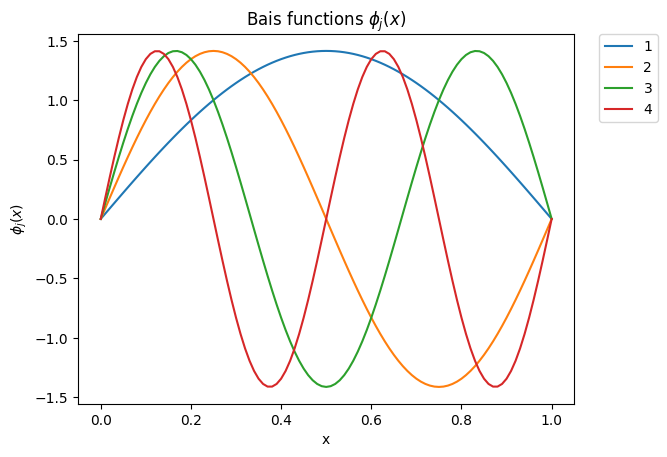

In [89]:
fig, ax = plt.subplots()
plt.title('Bais functions $\phi_{j}(x)$')
plt.xlabel("x")
plt.ylabel('$\phi_j(x)$')

for j in range(1,Nb+1):
    points = range(0,101)
    x_grid = np.zeros(len(points))
    phi_grid = np.zeros(len(points))
    for x_i,point in enumerate(points):
        x_grid[x_i] = (a/100)*point
        phi_grid[x_i] = basis(j, x_grid[x_i])
    ax.plot(x_grid, phi_grid, label=str(j))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

## Matrix elements

Now we need to calculate the __<span STYLE="color:red">matrix elements $H_{ij}$</span>__.  

Inside the well, the particle is a free particle and the Hamiltonian only involves the kinetic energy piece

$$H_{ij} = K_{ij} = -\frac{\displaystyle \hbar^2}{\displaystyle 2m}\langle \phi_i| \frac{\displaystyle d^2 }{\displaystyle d x^2} |\phi_j\rangle = -\frac{\displaystyle \hbar^2}{\displaystyle 2m} \int_{-\infty}^{\infty} dx \ \phi_i(x)^*  \frac{\displaystyle d^2 }{\displaystyle d x^2}  \phi_j(x).$$

To evaluate this in position space we need the second derivatives of our wavefunctions

$$ \frac{\displaystyle d^2 }{\displaystyle d x^2} \phi_j(x) $$,

which can be conveniently computed using SymPy -- taking derivatives is an automatic procedure that computers are good at doing without making mistakes!

In [90]:
def d2_basis(j, xx):
    f = sym.diff( sym.diff( orthonormal_basis[j-1] )  )
    f = sym.lambdify(x, f)
    return f(xx)

In [91]:
##Matrix elements of kinetic energy term

def Integrand1(x,i,j):
    return (-1/2)*basis(i,x)*d2_basis(j,x)

##Empty matrix to fill with matrix-element values
Kij = np.empty([Nb,Nb])

##Python array indices start at zero
##Only calculate Nb(Nb+1)/2 independent matrix elements, then use symmetry
for j in range(Nb):
    for i in range(j+1):
        Kij[i,j] = quad(Integrand1, 0, a, args=(i+1,j+1))[0]
        Kij[j,i] = Kij[i,j]

print("Kij = ",Kij)

Kij =  [[ 4.93480220e+00 -3.94044692e-14  3.13082893e-14 -1.25924621e-13]
 [-3.94044692e-14  1.97392088e+01  5.77485123e-14  1.75918189e-13]
 [ 3.13082893e-14  5.77485123e-14  4.44132198e+01 -5.90624854e-13]
 [-1.25924621e-13  1.75918189e-13 -5.90624854e-13  7.89568352e+01]]


### $\langle \phi_i| V(x) |\phi_j\rangle$  

Here, no calculation is needed because $V(x)=0$ throughout the integration region.  Therefore, all of the matrix elements are zero.

In [92]:
##Matrix elements of potential term
##Not necessary, but here for completeness

def Integrand2(x,i,j):
    return basis(i,x)*basis(j,x)*potential(x)

##Empty matrix to fill with matrix-element values
Vij = np.empty([Nb,Nb])

##Python array indices start at zero, but basis functions start with n,m=1
##Only calculate Nb(Nb+1)/2 independent matrix elements, then use symmetry
for j in range(Nb):
    for i in range(j+1):
        Vij[i,j] = quad(Integrand2, 0, a, args=(i+1,j+1))[0]
        Vij[j,i] = Vij[i,j]

print("Vij = ",Vij)

Vij =  [[ 8.43276830e+00 -1.33048024e-14 -4.75535544e+00  4.58332490e-14]
 [-1.33048024e-14  3.67741286e+00  7.57713402e-15 -4.38115972e+00]
 [-4.75535544e+00  7.57713402e-15  4.05160857e+00 -4.51425543e-14]
 [ 4.58332490e-14 -4.38115972e+00 -4.51425543e-14  5.70819207e+00]]


## Eigenvalue equation

Now we can calculate the eigenvalues and eigenvectors of the Hamiltonian.  __<span STYLE="color:blue">The allowed energies and wave functions are physical properties of the quantum-mechanical system, and must be independent of the choice of basis functions.</span>__  In practice, however, sensitivity to the basis choice can arise if the number of basis vectors Nb is too small.

<div class="alert alert-info">
We will calculate the stationary-state solutions for angular-momentum values from __$n$=1 to $n$=Nb__.
We will store the eigenvalues and eigenvectors in numpy arrays named $\texttt{Energies}$ and $\texttt{Coefficients}$ so that we can use them later.

Therefore the dimensions of the arrays are

  * \[$\texttt{Energies}$\] = Nb
  * \[$\texttt{Coefficients}$\] = Nb $\times$ Nb
  
The first index of $\texttt{Energies}$ and $\texttt{Coefficients}$ runs over the eigenvalue number; the second index of $\texttt{Coefficients}$ runs over the basis vectors.
</div>

After solving the matrix-element equation and saving the eigenvalues and eigenvectors to numpy arrays, we print out the energies for fixed $n$. We also print out the exact energies for comparison, which are given in natural units by

$$ E_n = \frac{ n^2 \pi^2 }{2} $$

In [93]:
#Arrays to hold eigenvalues and eigenvectors

Energies=np.empty([Nb])

Coefficients=np.empty([Nb,Nb])

#Solve eigenvalue equation
Hij = Kij + Vij
E, C = np.linalg.eigh(Hij)
for n in range(0,Nb):
    Energies[n]=E[n]
    for j in range(0,Nb):
        #***Note that the eigenfunctions are the *column* vectors of C***
        Coefficients[n,j]=C[j,n]

print("*** Energy levels ***")
for n in range(0,Nb):  #principal quantum number
    print("n =", str(n+1), ", En = ", Energies[n])

print("\n")
print("*** Exact energy levels ***")
for n in range(0,Nb):  #principal quantum number
    print("n =", str(n+1), ", En = ", (n+1)**2*Pi**2/2)

*** Energy levels ***
n = 1 , En =  12.734676316547915
n = 2 , En =  23.104820232528265
n = 3 , En =  49.09772255933662
n = 4 , En =  84.9768287122244


*** Exact energy levels ***
n = 1 , En =  4.934802200544679
n = 2 , En =  19.739208802178716
n = 3 , En =  44.41321980490211
n = 4 , En =  78.95683520871486


## Energies and wave functions

The plot below shows the coefficients $c_{n}^{j}$ versus the basis index $j$ for the energy eigenstates.  <span STYLE="color:red">The contributions from the individual basis functions $\phi_j(x)$ __must decrease with increasing $j$__</span> if we are going to be able to truncate the expansion of the exact wave function $\psi_{n}(x)$ in Eq. (1).  _(If this is not the case, we must use another approach!)_  Fortunately, we can see that in the case of the (in)finite square well, only a small number of basis vectors are needed to capture the behavior of the exact wave function.  

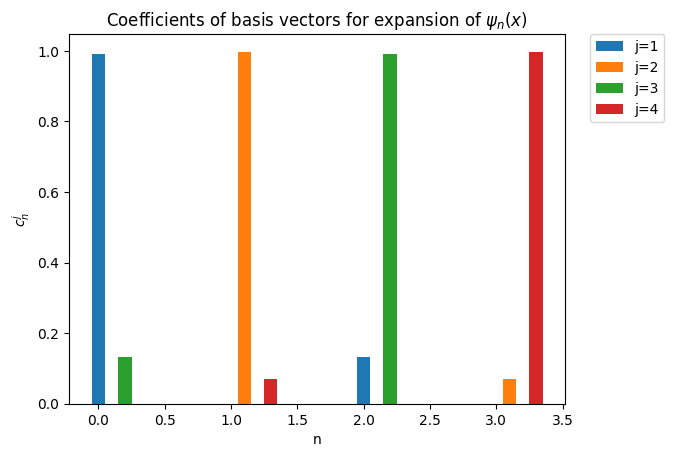

In [94]:
#Make bar chart of coefficients to get a feel for how important the higher-j basis vectors are

# Remember that it's |c_n^j|^2 that determines the probability of finding |phi_j> in the state |psi_n>
# We'll therefore plot |c_n^j| instead of c_n^j

width = 0.1
count=0
for n in range(0,Nb):
    C0 = np.abs(Coefficients[n])
    plt.bar(np.arange(Nb)+width*count, C0, width, label='j='+str(n+1))
    count=count+1

plt.title('Coefficients of basis vectors for expansion of $\psi_{n}(x)$')
plt.xlabel("n")
plt.ylabel('$c_{n}^j$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

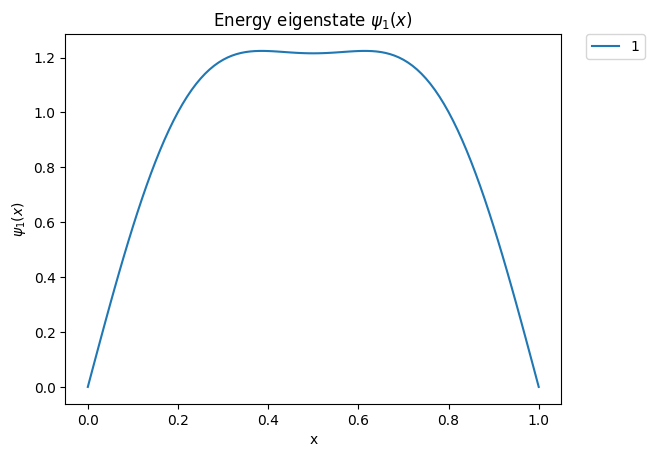

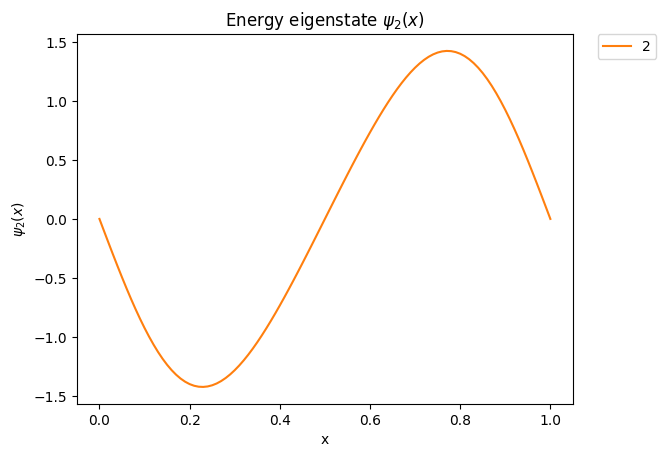

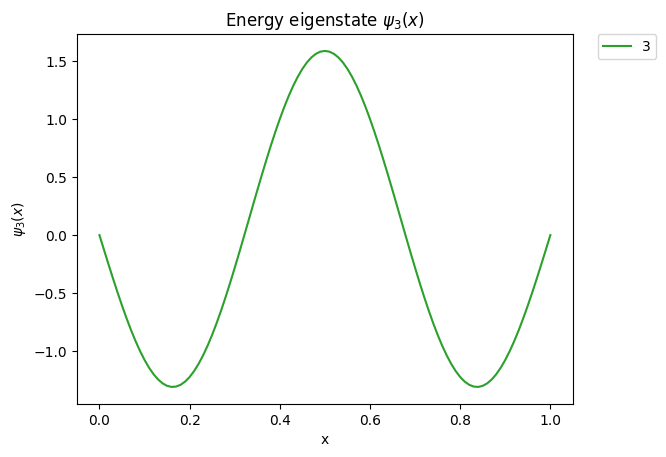

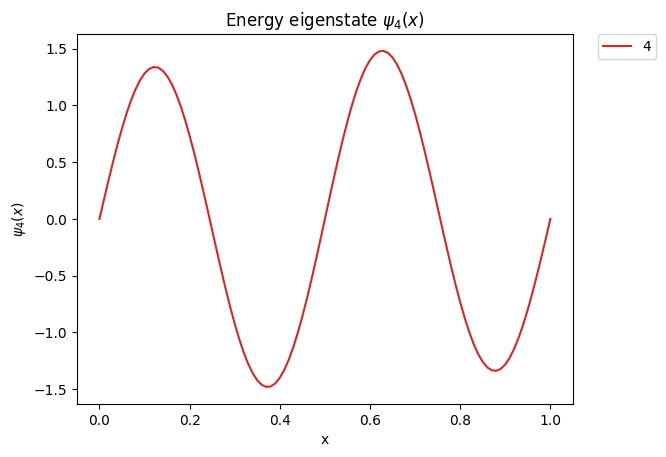

In [95]:
#Plot the stationary state wavefunctions

#plotting colors
cmap = plt.get_cmap("tab10")

for j in range(1,Nb+1):
    fig, ax = plt.subplots()
    plt.title(f'Energy eigenstate $\psi_{j}(x)$')
    plt.xlabel("x")
    plt.ylabel(f'$\psi_{j}(x)$')
    points = range(0,101)
    x_grid = np.zeros(len(points))
    psi_j_grid = np.zeros(len(points))
    for x_i,point in enumerate(points):
        x_grid[x_i] = (a/100)*point
        psi_j_grid[x_i] = sum([ Coefficients[j-1,k-1] * basis(k, x_grid[x_i]) for k in range(1,Nb+1)] )
    ax.plot(x_grid, psi_j_grid, label=str(j), color=cmap(j-1))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

Now let's make an __energy-level diagram__.  This is a plot of the energies for all states as obtained from the eigenvalues of the Hamiltonian in our basis.

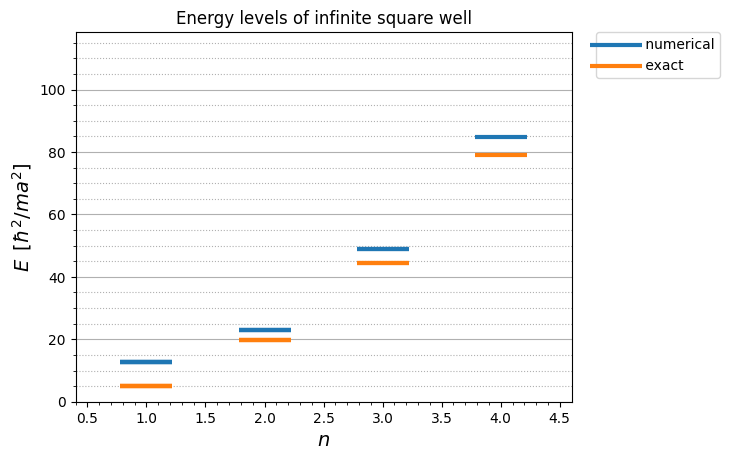

In [96]:
# For grid lines
from matplotlib.ticker import AutoMinorLocator

#Plot energies
fig, ax = plt.subplots()

EList = []
EList_exact = []
xList = []
for n in range(0,Nb):
    EList.append(Energies[n])
    EList_exact.append((n+1)**2*Pi**2/2)
    xList.append(n+1)
    # only include one copy of the legend label
    if n == 0:
        ax.scatter(xList, EList, s=1444, marker="_", linewidth=3, zorder=3, color=cmap(0), label=" numerical")
        ax.scatter(xList, EList_exact, s=1444, marker="_", linewidth=3, zorder=3, color=cmap(1), label=" exact")
    else:
        ax.scatter(xList, EList, s=1444, marker="_", linewidth=3, zorder=3, color=cmap(0))
        ax.scatter(xList, EList_exact, s=1444, marker="_", linewidth=3, zorder=3, color=cmap(1))

#Add horizontal grid lines and axes labels
minor_locator = AutoMinorLocator(2)
plt.minorticks_on()
ax.grid(axis='y',which='major')
ax.grid(axis='y',which='minor',linestyle='dotted')
ax.set_ylabel('$E\\ \, [\hbar^2 / ma^2]$',size=14)
ax.set_xlabel('$n$',size=14)
ax.set_ylim(0,1.5*max(EList_exact))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Energy levels of infinite square well')
ax.margins(0.2)
plt.show()

# Exercises

## Infinite square well part 1

1. Check that the basis functions satisfy the boundary conditions: $\phi_j(x=0) = \phi_j(x=a) = 0$. Next, check that the basis functions are orthonormal. To do this, you can use SciPy's quad function to do the integrals
$$N_{ij} = \int_0^a \phi_i(x) \phi_j(x)\ dx  $$
and check that $N_{ij} = \delta_{ij}$. The code for making $N_{ij}$ should be similar to the code for making $V_{ij}$, but without including the potential function.
Any set of functions satisfying the boundary conditions and orthonormality are a valid basis that we can use for this lab, so this verifies that the polynomials that we have constructed are a valid basis.


2. How many basis functions Nb are required to reproduce the exact ground-state energy within 0.1 (in natural units with hbar=m=1)? How about the minimum Nb to reproduce the exact ground-state energy within $10^{-6}$? How far off is the first-excited-state energy for this choice of Nb?

## Infinite square well part 2

3. Replace the list of unnormalized basis states with another set of functions that satisfies the boundary conditions,
$$\left\{ \sin\left( \frac{j \pi x}{a} \right) \right\}, \hspace{20pt} j \geq 1.$$
Repeat parts 1 and 2 above using this basis. What do you notice is different about the accuracy compared to exact results using this basis? What do you notice is different about the eigenvector coefficients for these two bases?



## Wells within wells

4. Consider a more complicated system, where in addition to the infinite square well constraining the system to [0, a], there is also a finite step potential inside the range [b, a-b] with $b = 0.3$. The new potential in this case is

$$
V(x)=\left\{\begin{array}{ll}
\infty & \quad x \leq 0, \\
0 & \quad  0 < x < b,\\
V_0 & \quad  b < x < b-a,\\
0 & \quad  b-a < x < a,\\
\infty & \quad x \geq a.
\end{array}
\right.
$$

How do your results using both bases change for $V_0 = -0.1$? How about $V_0 = -10.0$ ?


In [97]:
def Integrand2(x,i,j):
    return basis(i,x)*basis(j,x)

##Empty matrix to fill with matrix-element values
Nij = np.empty([Nb,Nb])

##Python array indices start at zero, but basis functions start with n,m=1
##Only calculate Nb(Nb+1)/2 independent matrix elements, then use symmetry
for j in range(Nb):
    for i in range(j+1):
        Nij[i,j] = quad(Integrand2, 0, a, args=(i+1,j+1))[0]
        Nij[j,i] = Nij[i,j]

print("Nij = ",Nij)

# for the leading diagonal, where i=j, we see Nij is 1.

Nij =  [[ 1.00000000e+00 -2.02189882e-15  7.97972799e-16 -1.58943310e-15]
 [-2.02189882e-15  1.00000000e+00  1.28397649e-15  2.24290171e-15]
 [ 7.97972799e-16  1.28397649e-15  1.00000000e+00 -7.51401365e-15]
 [-1.58943310e-15  2.24290171e-15 -7.51401365e-15  1.00000000e+00]]


In [98]:
def percentage_diff(predicted, measured):
  numerator = abs(predicted - measured)
  denom = (predicted + measured) / 2
  diff = numerator / denom
  return diff


In [99]:
EList_exact

[4.934802200544679, 19.739208802178716, 44.41321980490211, 78.95683520871486]